# Load data

In [198]:
import tensorflow as tf
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 

In [221]:
data = tf.keras.utils.image_dataset_from_directory('combine raw dataset')  # batch size default 32

Found 468 files belonging to 3 classes.


In [222]:
# iterator can loop through and continuousely pull data batches back
data_iterator = data.as_numpy_iterator()  

In [223]:
# grabbing one batch back,size default 32, compose two parts: images and label
batch = data_iterator.next() 

In [224]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [225]:
batch[1]   #label 0:Corgi, 1:German ,2:Golden

array([1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 1, 1, 0, 0, 1, 2, 2, 1])

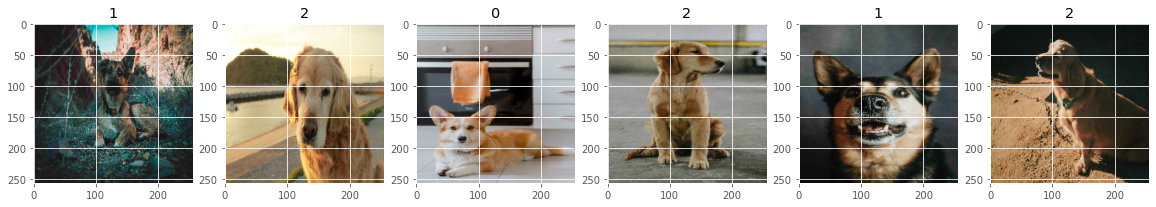

In [226]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#  Preprocess data

## Scale Data

In [227]:
data = data.map(lambda x,y: (x/255, y))

## Split Data

In [230]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [231]:
print(len(data),train_size,val_size,test_size)

15 9 3 3


In [232]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning

## Build Deep Learning Model Structure

In [233]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [234]:
model = Sequential()

In [235]:
# first layer
model.add(Conv2D(16, (3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# second layer
model.add(Conv2D(32, (3,3),1,activation='relu'))
model.add(MaxPooling2D())

# third layer
model.add(Conv2D(16, (3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))  #sigmoid,softmax

In [236]:
# model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [237]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

## Train the Model

In [238]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= 'logs')

In [239]:
hist = model.fit(train, epochs=20, validation_data=val) #，callbacks=[tensorboard_callback] 

Epoch 1/17
9/9 [==============================] - 8s 745ms/step - loss: 1.3441 - accuracy: 0.3299 - val_loss: 1.0841 - val_accuracy: 0.4792
Epoch 2/17
9/9 [==============================] - 8s 714ms/step - loss: 1.0472 - accuracy: 0.5382 - val_loss: 0.9907 - val_accuracy: 0.5521
Epoch 3/17
9/9 [==============================] - 8s 732ms/step - loss: 0.9678 - accuracy: 0.5278 - val_loss: 0.9182 - val_accuracy: 0.5833
Epoch 4/17
9/9 [==============================] - 8s 727ms/step - loss: 0.8776 - accuracy: 0.5938 - val_loss: 0.7644 - val_accuracy: 0.6354
Epoch 5/17
9/9 [==============================] - 8s 740ms/step - loss: 0.6981 - accuracy: 0.7118 - val_loss: 0.7251 - val_accuracy: 0.7500
Epoch 6/17
9/9 [==============================] - 8s 731ms/step - loss: 0.7014 - accuracy: 0.7257 - val_loss: 0.7385 - val_accuracy: 0.6042
Epoch 7/17
9/9 [==============================] - 8s 746ms/step - loss: 0.6590 - accuracy: 0.7535 - val_loss: 0.5358 - val_accuracy: 0.8125
Epoch 8/17
9/9 [====

## Plot Performance

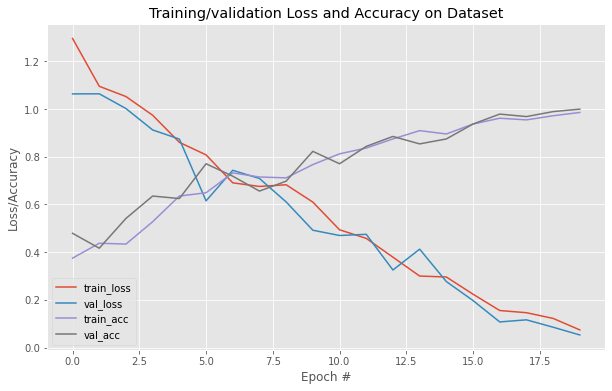

In [21]:
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
plt.plot( hist.history["loss"], label="train_loss")
plt.plot( hist.history["val_loss"], label="val_loss")
plt.plot( hist.history["accuracy"], label="train_acc")
plt.plot( hist.history["val_accuracy"], label="val_acc")
plt.title("Training/validation Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

# Evaluate

In [240]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from scipy.stats import rankdata
acc = SparseCategoricalAccuracy()

In [241]:
y_test_total = np.array([], dtype=int) 
y_pred_total = np.array([[]])
for batch in test.as_numpy_iterator(): 
    X_test, y_test = batch
    print('{} test images'.format(len(X_test)))
    y_test_total = np.concatenate([y_test_total, y_test])
    y_pred = model.predict(X_test)
    if y_pred_total.size == 0:
        y_pred_total = y_pred
    else:
        y_pred_total = np.concatenate([y_pred_total, y_pred])
    acc.update_state(y_test, y_pred)

32 test images
1/1 [==============================] - 0s 108ms/step
32 test images
1/1 [==============================] - 0s 77ms/step
20 test images
1/1 [==============================] - 0s 87ms/step


In [242]:
print('Accuracy:{}'.format(acc.result().numpy()))

Accuracy:0.988095223903656


In [243]:
# m = tf.keras.metrics.sparse_categorical_accuracy(y_test_total, y_pred_total)
# m.numpy()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [245]:
def get_predict(y_pred_total):
    # List comprehension to map the lambda function across all records of yPred
    y_pred_total_rank = np.array([rankdata(x) for x in y_pred_total])
    # get list of indices of max rank value, return the list in array format
    return np.array([i for lst in y_pred_total_rank for i, v in enumerate(lst) if v == len(lst)])
y_pred_total_new = get_predict(y_pred_total)
y_pred_total_new

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2,
       2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1,
       2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0,
       2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2])

In [246]:
print('Accuracy:{}'.format(acc.result().numpy()))
cm = confusion_matrix(y_test_total, y_pred_total_new)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test_total, y_pred_total_new, target_names=['Corgi', 'German', 'Golden']))

Accuracy:0.988095223903656
Confusion Matrix : 
 [[28  0  1]
 [ 0 26  0]
 [ 0  0 29]]
              precision    recall  f1-score   support

       Corgi       1.00      0.97      0.98        29
      German       1.00      1.00      1.00        26
      Golden       0.97      1.00      0.98        29

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



[Text(0, 0.5, 'Corgi'), Text(0, 1.5, 'German'), Text(0, 2.5, 'Golden')]

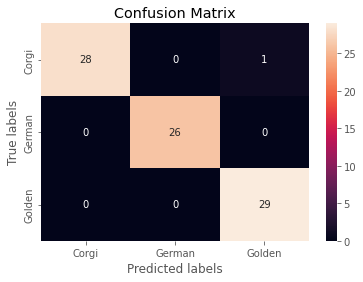

In [247]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Corgi', 'German' , 'Golden']); ax.yaxis.set_ticklabels(['Corgi', 'German' , 'Golden'])

# Test 

In [76]:
import cv2

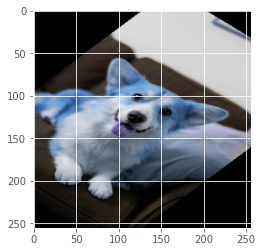

In [77]:
img = cv2.imread('test2.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [78]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 23ms/step


array([[0.92517835, 0.05580158, 0.01902004]], dtype=float32)

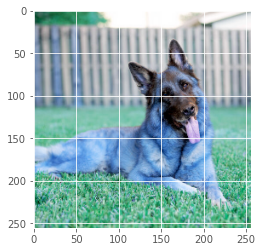

In [79]:
img = cv2.imread('test1.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 21ms/step


array([[5.7285607e-02, 9.4268388e-01, 3.0519474e-05]], dtype=float32)